# Light Out を線形代数を用いて解く
参考：https://qiita.com/LyricalMaestro0/items/2bd9ef55cb49fe788179

In [1]:
import random
import itertools
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. N*Mサイズを指定する。

In [2]:
random_flag = False

if random_flag:
    # ランダム版
    n = random.randint(1, 10)
    m = random.randint(1, 10)
else:
    n = 5
    m = 5
    
print(n, m)

5 5


## 2. 初期の盤面を決定

In [3]:
init_state = random.sample(range(n*m), k=random.randint(1,n*m))
bord_state = np.array([1 if i in init_state else 0 for i in range(n*m)])

print(sorted(init_state))
print(bord_state)

[0, 2, 3, 4, 6, 7, 12, 14, 15, 16, 17, 18, 21, 22, 23, 24]
[1 0 1 1 1 0 1 1 0 0 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1]


## 3. 状態の表示

In [4]:
def display_state(n, m, states, color='blue'):
    # config
    plt.figure(figsize=(n,m))
    plt.xlim(0,n)
    plt.ylim(0,m)
    plt.tick_params(axis='both', which='both', bottom=False, top=False,
                    labelbottom=False, right=False, left=False, labelleft=False)

    # grid
    plt.xticks(range(n))
    plt.yticks(range(m))
    plt.grid(which='major')

    # plot ON-OFF state
    for i, state in enumerate(states):
        if state:
            plt.fill_between((i%n, i%n+1), m-i//n-1, m-i//n, facecolor=color)

    plt.show()

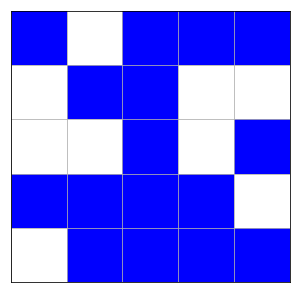

In [5]:
display_state(n, m, bord_state)

## 4. solver

### 4.1 各所押下時の挙動を列挙

In [6]:
push_state = []

for i in range(m):
    for j in range(n):
        tmp = np.array([[0]*n]*m)
        tmp[i, j] = 1
        for k in [j-1, j+1]:
            if 0 <= k < n:
                tmp[i, k] = 1
        for k in [i-1, i+1]:
            if 0 <= k < m:
                tmp[k, j] = 1
        push_state.append(tmp.reshape(-1))

push_state = np.array(push_state)
print(push_state)

[[1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 

In [ ]:
ps = [p for p in itertools.product([0,1], repeat=n*m)]

0


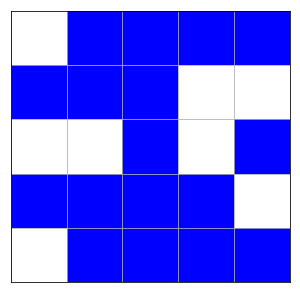

1


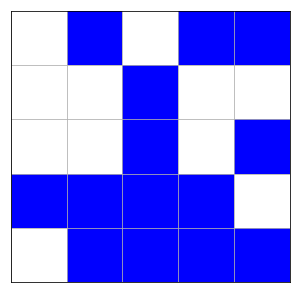

2


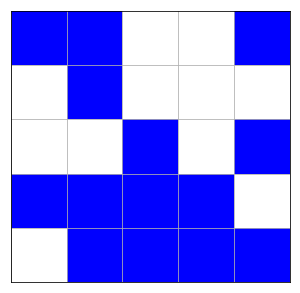

3


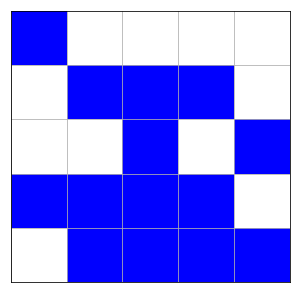

4


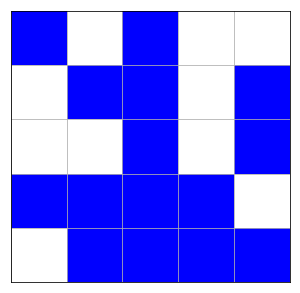

In [9]:
f = lambda x,y: np.array(list(map(lambda z:z%2, x+y)))

for i in range(5):
    print(i)
    new_state = f(bord_state, push_state[i])
    display_state(n, m, new_state)